### Video Sequences data preparation

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import re

### Padded with lastet frame

In [2]:
# class VideoSequenceDataset(Dataset):
#     def __init__(self, root_dir, transform=None, sequence_length=160):
#         self.root_dir = root_dir
#         self.transform = transform
#         self.sequence_length = sequence_length  # Set target sequence length
#         self.classes = os.listdir(root_dir)
#         self.data = self.load_sequences()

#     def load_sequences(self):
#         data = []
#         for class_idx, class_folder in enumerate(self.classes):
#             class_path = os.path.join(self.root_dir, class_folder)

#             # List and sort frames numerically
#             image_sequences = sorted(os.listdir(class_path), key=self.natural_sort_key)
#             frames = [os.path.join(class_path, img) for img in image_sequences]

#             data.append((frames, class_idx))
#         return data

#     def natural_sort_key(self, string):
#         # Extract numbers from the filename to ensure numeric sorting
#         return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', string)]

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         image_paths, label = self.data[idx]
#         images = [Image.open(img_path).convert('RGB') for img_path in image_paths]

#         # Pad the sequence to the target length (self.sequence_length)
#         if len(images) < self.sequence_length:
#             pad_size = self.sequence_length - len(images)
#             # Repeat the last frame or pad with black frames
#             last_image = images[-1]
#             pad_images = [last_image] * pad_size
#             images.extend(pad_images)
#         elif len(images) > self.sequence_length:
#             # Truncate the sequence if it exceeds the target length
#             images = images[:self.sequence_length]

#         if self.transform:
#             images = [self.transform(img) for img in images]

#         images = torch.stack(images, dim=0)  # Stack into a tensor

#         return images, label

### Padded with zeros

In [3]:
class VideoSequenceDataset(Dataset):
    def __init__(self, root_dir, transform, sequence_length=160):
        self.root_dir = root_dir
        self.transform = transform
        self.sequence_length = sequence_length  # Set target sequence length
        self.classes = os.listdir(root_dir)
        self.data = self.load_sequences()

    def load_sequences(self):
        data = []
        for class_idx, class_folder in enumerate(self.classes):
            class_path = os.path.join(self.root_dir, class_folder)

            # List and sort frames numerically
            image_sequences = sorted(os.listdir(class_path), key=self.natural_sort_key)
            frames = [os.path.join(class_path, img) for img in image_sequences]

            data.append((frames, class_idx))
        return data

    def natural_sort_key(self, string):
        # Extract numbers from the filename to ensure numeric sorting
        return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', string)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_paths, label = self.data[idx]
        images = [Image.open(img_path).convert('RGB') for img_path in image_paths]

        # If there are fewer images than the sequence length, pad with zeros
        if len(images) < self.sequence_length:
            pad_size = self.sequence_length - len(images)
            # Create a black (zero) image of the same size as the input (e.g., 224x224)
            zero_image = Image.new('RGB', (224, 224), (0, 0, 0))  # Black image
            pad_images = [zero_image] * pad_size
            images.extend(pad_images)
        elif len(images) > self.sequence_length:
            # Truncate the sequence if it exceeds the target length
            images = images[:self.sequence_length]

        if self.transform:
            images = [self.transform(img) for img in images]

        images = torch.stack(images, dim=0)  # Stack into a tensor

        return torch.tensor(images, dtype=torch.float32), label

In [4]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to a fixed size
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

In [5]:
# Set parameters
test_dir = 'C:/Users/araya/Desktop/frame/train'
sequence_length = 160  # Set how many frames per sequence

# Initialize dataset and dataloader
dataset = VideoSequenceDataset(root_dir=test_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

# Example of accessing the data
for batch_idx, (frames, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx+1}")
    print("Frames shape:", frames.shape)  # Should be [batch_size, sequence_length, C, H, W]
    print("Labels:", labels)
    break  # Process just the first batch

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


Batch 1
Frames shape: torch.Size([3, 160, 3, 256, 256])
Labels: tensor([4, 8, 2])


In [6]:
dataloader

In [7]:
dataset

In [8]:
len(dataloader.dataset[0][0])

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


160

In [9]:
dataloader.dataset[0][0][0]

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


tensor([[[ 0.2796,  0.2796,  0.2624,  ...,  0.2453,  0.2453,  0.2453],
         [ 0.2796,  0.2796,  0.2624,  ...,  0.2453,  0.2453,  0.2453],
         [ 0.2796,  0.2796,  0.2624,  ...,  0.2453,  0.2453,  0.2453],
         ...,
         [-0.4397, -0.4397, -0.4397,  ..., -0.4911, -0.4911, -0.4911],
         [-0.4397, -0.4397, -0.4397,  ..., -0.4911, -0.4911, -0.4911],
         [-0.4397, -0.4397, -0.4397,  ..., -0.4911, -0.4911, -0.4911]],

        [[ 0.3978,  0.3978,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
         [ 0.3978,  0.3978,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
         [ 0.3978,  0.3978,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
         ...,
         [-0.3025, -0.3025, -0.3025,  ..., -0.3550, -0.3550, -0.3550],
         [-0.3025, -0.3025, -0.3025,  ..., -0.3550, -0.3550, -0.3550],
         [-0.3025, -0.3025, -0.3025,  ..., -0.3550, -0.3550, -0.3550]],

        [[ 0.7576,  0.7576,  0.7402,  ...,  0.7054,  0.7054,  0.7054],
         [ 0.7576,  0.7576,  0.7402,  ...,  0

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


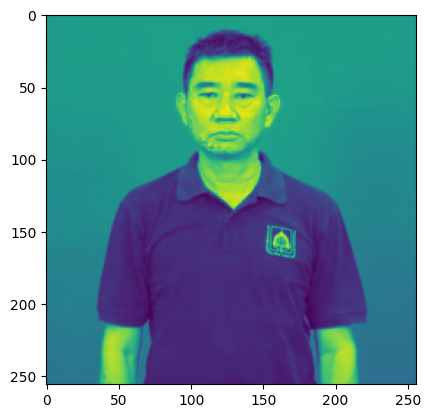

In [10]:
import matplotlib.pyplot as plt 

plt.imshow(dataloader.dataset[0][0][141][0]) # [จำนวน class][][เฟรมที่][เปลี่ยนสี]

In [11]:
dataloader.dataset.classes

['กฎกระทรวง',
 'กฎหมายรัฐธรรมนูญ',
 'กรมอนามัย',
 'กรรม',
 'กรรมสิทธิ์',
 'กระโดด',
 'กล้วยบวชชี',
 'กล้วยเชื่อม',
 'กังวล',
 'กีฬา']

In [12]:
print(len(dataloader.dataset[0][0]))  
print(len(dataloader.dataset[1][0]))  
print(len(dataloader.dataset[2][0]))  
print(len(dataloader.dataset[3][0]))  
print("เราต้อง padded lenght ให้เท่ากัน ก่อนเข้า model")

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


160
160
160
160
เราต้อง padded lenght ให้เท่ากัน ก่อนเข้า model


### -------------------------------------------------------------------------------------------------------------------------
### cuda or cpu ?

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [14]:
# import torch 
# import torch.nn as nn 
# import torch.nn.functional as F
# import torchvision
# from torchvision import models
# from torchvision.models import resnet18

# class Model(nn.Module):
#     def __init__(self, num_classes=9):
#         super(Model, self).__init__()
#         self.resnet = models.mobilenet_v2(pretrained=True)
#         self.resnet.fc = nn.Sequential(nn.Linear(self.resnet.fc.in_features, 512))
#         self.fc1 = nn.Linear(512, 128)
#         self.fc2 = nn.Linear(128, num_classes)

#     def forward(self, x_3d):
#         # (bs, C, T, H, W)
#         x_3d = x_3d.permute(0, 2, 1, 3, 4)

#         logits = []
#         for t in range(x_3d.size(1)):
#             out = self.resnet(x_3d[:, t, :, :, :])

#             x = self.fc1(out)
#             x = F.relu(x)
#             x = self.fc2(x)

#             logits.append(x)

#         # Mean Pooling 
#         logits = torch.stack(logits, dim=0)
#         logits = torch.mean(logits, dim=0)
#         return logits

### Grain Module

In [15]:
import torch
import torch.nn as nn
from torchvision import models

class GELUBatchNorm(nn.Module):
    def __init__(self, out_channels):
        super(GELUBatchNorm, self).__init__()
        self.gelu = nn.GELU()
        self.batch_norm = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.gelu(x)
        x = self.batch_norm(x)
        return x

# Define the Grain Module
class GrainModule(nn.Module):
    def __init__(self, in_channels):
        super(GrainModule, self).__init__()
        # First convolution with stride=2 and 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, stride=2, padding=1)
        self.gb1 = GELUBatchNorm(64)  # GB after Conv
        
        # Second convolution layer
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.gb2 = GELUBatchNorm(128)  # GB after Conv

        # Third convolution layer
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.gb3 = GELUBatchNorm(256)  # GB after Conv

    def forward(self, x):
        # Pass through the first conv + GB
        x = self.conv1(x)
        x = self.gb1(x)

        # Pass through the second conv + GB
        x = self.conv2(x)
        x = self.gb2(x)

        # Pass through the third conv + GB
        x = self.conv3(x)
        x = self.gb3(x)

        return x

In [16]:
# model = Model(num_classes=9)
grain_module = GrainModule(in_channels=3)

In [17]:
param = sum(p.numel() for p in grain_module.parameters() if p.requires_grad)
print(f"Model has {param} parameters")

Model has 371712 parameters


In [18]:
dataloader.dataset[0][0].shape

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


torch.Size([160, 3, 256, 256])

In [19]:
input = dataloader.dataset[5][0]

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


In [20]:
input.shape

torch.Size([160, 3, 256, 256])

In [21]:
output = grain_module(input)

In [22]:
output

tensor([[[[ 2.9451e-01,  6.6346e-01,  6.9538e-01,  ...,  9.2101e-01,
            9.0307e-01,  9.0380e-01],
          [-4.9520e-01,  1.5538e+00,  1.5138e+00,  ...,  1.7345e+00,
            1.7961e+00,  1.7689e+00],
          [-4.7577e-01,  1.4668e+00,  1.5354e+00,  ...,  1.8070e+00,
            1.7547e+00,  1.7671e+00],
          ...,
          [-5.9747e-01, -1.9346e-03,  8.9173e-02,  ...,  1.8993e-01,
            3.3940e-01,  4.3240e-01],
          [-6.2225e-01,  1.9003e-02, -7.0739e-02,  ...,  3.2771e-01,
            4.2848e-01,  3.5775e-01],
          [-6.0583e-01, -3.1053e-02, -1.2930e-01,  ...,  2.6612e-01,
            3.1793e-01,  2.5312e-01]],

         [[-3.7064e-01, -4.2609e-01, -4.0349e-01,  ..., -4.2542e-01,
           -4.2696e-01, -4.3154e-01],
          [-4.8025e-01, -2.1465e-01, -1.9144e-01,  ..., -2.9523e-01,
           -3.3035e-01, -3.3993e-01],
          [-5.1513e-01, -1.0886e-01, -2.2758e-01,  ..., -3.0404e-01,
           -2.8769e-01, -3.4240e-01],
          ...,
     

In [23]:
output.shape

torch.Size([160, 256, 32, 32])

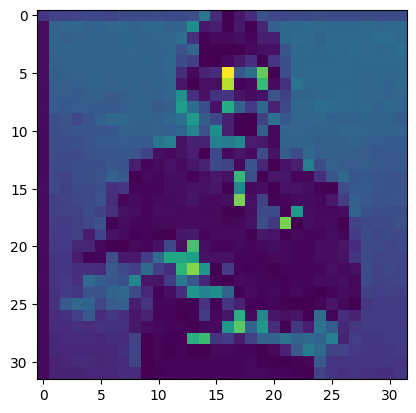

In [24]:
import matplotlib.pyplot as plt 

# output.shape = torch.Size([160, 256, 28, 28])
plt.imshow(output[36][0].detach().numpy())

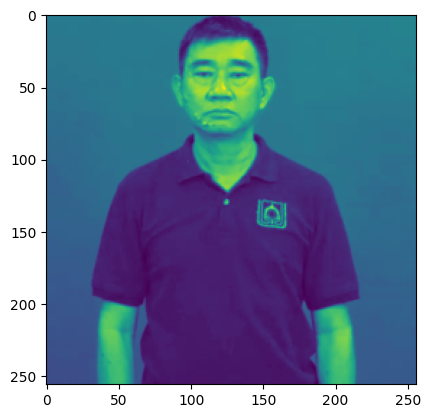

In [25]:
# input.shape = torch.Size([160, 3, 224, 224])
plt.imshow(input[93][0].detach().numpy())

### Combine CNN with LSTM

In [26]:
device = torch.device('cpu')
device

device(type='cpu')

In [27]:
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
#         super(LSTM, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.cnn = GrainModule(in_channels=3)
#         self.lstm = nn.LSTM(input_size=256, hidden_size=hidden_size, num_layers=num_layers)
#         self.fc1 = nn.Linear(hidden_size, num_classes)
#         self.dropout = nn.Dropout(dropout)

#     def forward(self, x):

#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()

#         # Initialize cell state
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()

#         x = self.cnn(x)
#         x = self.dropout(x) # -> torch.Size([160, 256, 32, 32])
#         # x = x.permute(2,1,0,3) # -> torch.Size([32, 256, 160, 32])
#         x = x.permute(3,2,0,1)
#         x = x[0,:,:,:]
#         x, (hn, cn) = self.lstm(x, (h0.detach(),c0.detach()))
#         x = self.fc1(x[:, -1, :])

#         return x

In [28]:
class CNNBranch(nn.Module):
    def __init__(self, in_channels):
        super(CNNBranch, self).__init__()
        self.cnn = GrainModule(in_channels=3)
        self.conv1 = nn.Conv2d(in_channels, 512, kernel_size=3, stride=1, padding=1)
        self.gb1 = GELUBatchNorm(512)
        self.conv2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.gb2 = GELUBatchNorm(512)

    def forward(self, x):
        x = self.cnn(x)
        x = self.conv1(x)
        x = self.gb1(x)
        x = self.conv2(x)
        x = self.gb2(x)
        return x


In [29]:
class TransformerLayer(nn.Module):
    def __init__(self, input_dim, num_heads):
        super(TransformerLayer, self).__init__()
        self.conv1 = nn.Conv2d(input_dim, 512, kernel_size=3, padding=1)
        self.layer_norm1 = nn.LayerNorm([512, 32, 32])  # Example size; adjust according to the data
        self.mhsa = nn.MultiheadAttention(embed_dim=512, num_heads=num_heads)
        self.layer_norm2 = nn.LayerNorm(512)
        self.mlp_conv = nn.Conv2d(512, 256, kernel_size=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.layer_norm1(x)
        # Convert to shape suitable for MHSA
        batch_size, channels, height, width = x.shape
        x = x.view(batch_size, channels, -1).permute(2, 0, 1)  # (seq_len, batch_size, channels)
        attn_output, _ = self.mhsa(x, x, x)
        attn_output = self.layer_norm2(attn_output.permute(1, 2, 0).view(batch_size, channels, height, width))
        x = self.mlp_conv(attn_output)
        return x


In [30]:
class CNNBranch(nn.Module):
    def __init__(self, in_channels):
        super(CNNBranch, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 512, kernel_size=3, stride=1, padding=1)
        self.gb1 = GELUBatchNorm(512)
        self.conv2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.gb2 = GELUBatchNorm(512)

    def forward(self, x):
        x = self.conv1(x)
        x = self.gb1(x)
        x = self.conv2(x)
        x = self.gb2(x)
        return x


In [31]:
class ClassificationModule(nn.Module):
    def __init__(self, num_classes):
        super(ClassificationModule, self).__init__()
        self.conv = nn.Conv2d(512 + 256, 512, kernel_size=1)  # Concatenated size of transformer and CNN
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x


In [32]:
class SignLanguageModel(nn.Module):
    def __init__(self, num_classes, in_channels=3, num_heads=8):
        super(SignLanguageModel, self).__init__()
        self.grain_module = GrainModule(in_channels)
        self.transformer = TransformerLayer(input_dim=256, num_heads=num_heads)
        self.cnn_branch = CNNBranch(in_channels=256)
        self.classifier = ClassificationModule(num_classes)

    def forward(self, x):
        grain_features = self.grain_module(x)
        transformer_features = self.transformer(grain_features)
        cnn_features = self.cnn_branch(grain_features)
        
        # Concatenate features from transformer and CNN
        final_features = torch.cat([transformer_features, cnn_features], dim=1)
        
        # Classification
        predicted_class = self.classifier(final_features)
        return predicted_class


In [33]:
def train(model, dataloader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for batch in dataloader:
            inputs, labels = batch
            inputs = inputs[0,:,:,:,:]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch : {epoch}/{num_epochs}')

In [34]:
import torch.optim as optim

In [35]:
# Initialize the model
model = SignLanguageModel(num_classes=10)  # Adjust based on your number of classes

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train and test the model
train(model, dataloader, criterion, optimizer, num_epochs=10)

C:\Users\araya\AppData\Local\Temp\ipykernel_17276\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 5368709120 bytes.

In [ ]:
# from sklearn.metrics import f1_score, recall_score

# num_epochs = 900
# loss_logger = []
# accuracy_logger = []
# f1_logger = []
# recall_logger = []

# all_preds = []
# all_labels = []
# # n_epochs = []
# for epoch in range(num_epochs):
#     total_correct = 0
#     total_samples = 0
#     model.train()
#     for i, (sequences, labels) in enumerate(dataloader):
#         # Move data to the device
#         # labels = labels.type(torch.LongTensor)   # casting to long
#         sequences = sequences.to(device)
#         labels = labels.to(device)
#         sequences = sequences[0,:,:,:,:]
        
#         # Forward pass
#         outputs = model(sequences)
#         _, predicted = torch.max(outputs, 1)
#         loss = criterion(outputs, labels)

#         total_correct += (predicted == labels).sum().item()
#         total_samples += labels.size(0)

#         # Store predictions and labels for calculating metrics
#         all_preds.extend(predicted.cpu().numpy())  # Store predictions
#         all_labels.extend(labels.cpu().numpy())    # Store true labels
        
#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # loss_logger.append(loss.item())
#     loss_logger.append(loss.item())
#     accuracy = 100 * total_correct /total_samples

#     # Calculate F1 score and recall
#     f1 = f1_score(all_labels, all_preds, average='weighted')  # Weighted average for multi-class
#     recall = recall_score(all_labels, all_preds, average='weighted')

#     f1_logger.append(f1)
#     recall_logger.append(recall)

#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f} , Accuracy : {accuracy:.2f}%, F1 Score: {f1:.2f}, Recall: {recall:.2f}')
#     accuracy_logger.append(accuracy)
#     # n_epochs.append(epoch)